In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('dataset.csv')
print(df.head())

x=df.iloc[:,0:2].values
y=df.iloc[:,2].values



    color  diameter  label
0   green         3  Mango
1  yellow         3  Mango
2     red         1  Grape
3     red         1  Grape
4  yellow         3  Lemon


In [2]:
from sklearn.preprocessing import LabelEncoder
x_labelencoder = LabelEncoder()
x[:, 0] = x_labelencoder.fit_transform(x[:, 0])
print (x)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

y=y.reshape(-1,1)
print(y)





[[0 3]
 [2 3]
 [1 1]
 [1 1]
 [2 3]]
[2 2 0 0 1]
[[2]
 [2]
 [0]
 [0]
 [1]]


In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)



In [4]:
from sklearn.tree import DecisionTreeClassifier
#decision_tree = DecisionTreeClassifier(criterion = "gini", max_depth = 3,random_state = 100)
#decision_tree.fit(X_train, y_train)
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=2)
decision_tree.fit(x_train, y_train)
predictValues =decision_tree.predict(x_test)

predictValues




array([0])

In [5]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
print("RMSE is:-")
print(np.sqrt(metrics.mean_squared_error(y_test, predictValues)))


RMSE is:-
0.0


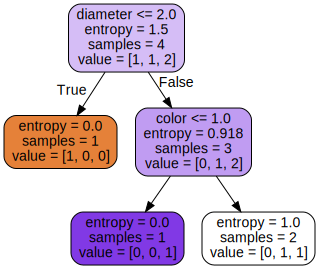

In [6]:
data_feature_names = [ 'color', 'diameter']
!pip install graphviz

from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG
from IPython.display import display

graph = Source(tree.export_graphviz(decision_tree, out_file=None
   , feature_names=data_feature_names
   , filled = True,rounded=True))
display(SVG(graph.pipe(format='svg')))